# <font color='blue'> Polynomial Regression</font>

## 1. Polynomials in one variable

<font color='slateblue'> Main idea: Linear combination of different powers of the feature values.

$$\large
P(x):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

What we hope to achieve:

$$\large \mathbb{E}(Y|X=x)\approx \beta_p x^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0$$

IMPORTANT: P(x) is nonlinear in x. However if x is fixed (x is your data) and $\beta$ is the input we have
$$\large
L(\beta):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

is linear in $\beta=(\beta_0,\beta_1,\beta_2,...\beta_p).$

$$\large L(\beta+\gamma)= L(\beta)+L(\gamma)$$

and

$$\large L(c\cdot \beta) = c\cdot L(\beta)$$

for any two vectors $\beta$ and $\gamma$, and any scalar (real number) $c.$


### The Coefficient of Determination

$$\large R^2:=1-\frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}$$

We can solve for the sum of squared residuals:

$$\large \frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}= 1- R^2$$

so we obtain:

$$\large \sum (residual_i)^2= \sum(y_i-\bar{y})^2\cdot (1-R^2)$$

We got that

$$\Large \text{MSE} = \frac{1}{n}\cdot \sum(y_i-\bar{y})^2\cdot (1-R^2)$$


### Example

What is the format of a quadratic polynomial of two variables, say $u$ and $v$:

$$\large \text{poly}(u,v):=\beta_0+\beta_1\cdot u+\beta_2\cdot u^2 + \beta_3 v + \beta_4 v^2 +\beta_5 u\cdot v$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import operator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# here we simulate polynomial data
np.random.seed(123)
x = 2 - 3 * np.random.normal(loc=0,scale=1,size=150)
y = x - 1.4 * (x ** 2) + 0.25 * (x ** 3) + 2.5*np.random.normal(loc=-3, scale=3,size=150)
# we simulated the polynomial x-1.5*x^2+0.25*x^3 and we added some Gaussian noise

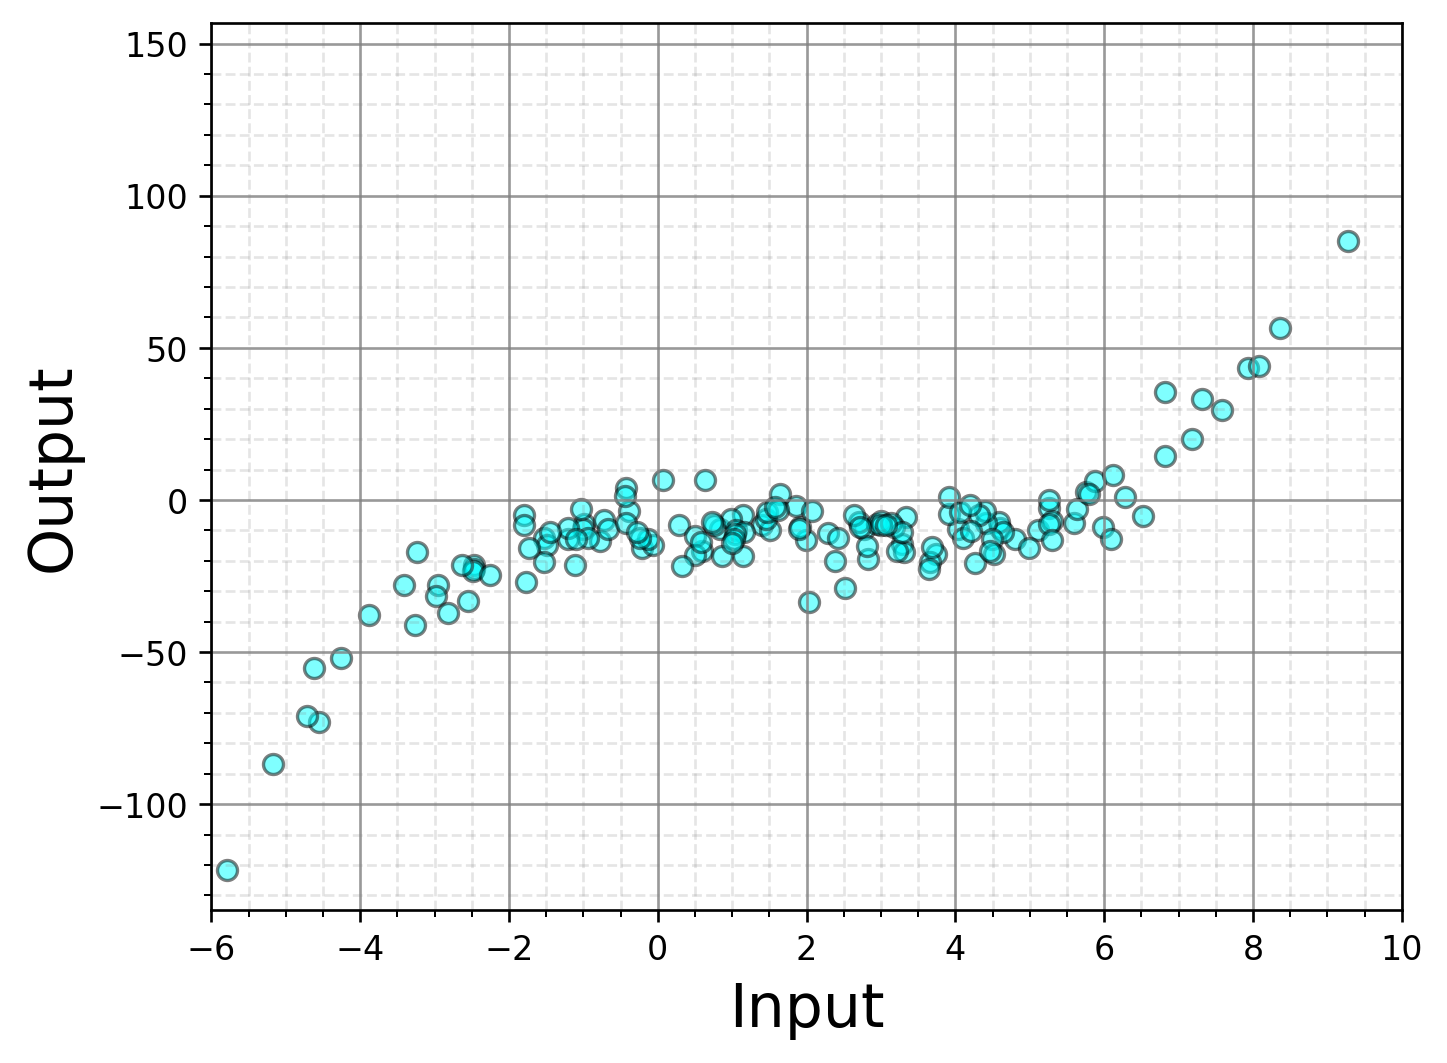

In [4]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

### <font color='red'> Critical Thinking: Is a straight line a good idea for capturing the relationship between x and y?

In [ ]:
x.shape

(100,)

In [5]:
model = LinearRegression()

In [6]:
model.fit(x.reshape(-1,1),y)
y_pred = model.predict(x.reshape((-1,1)))

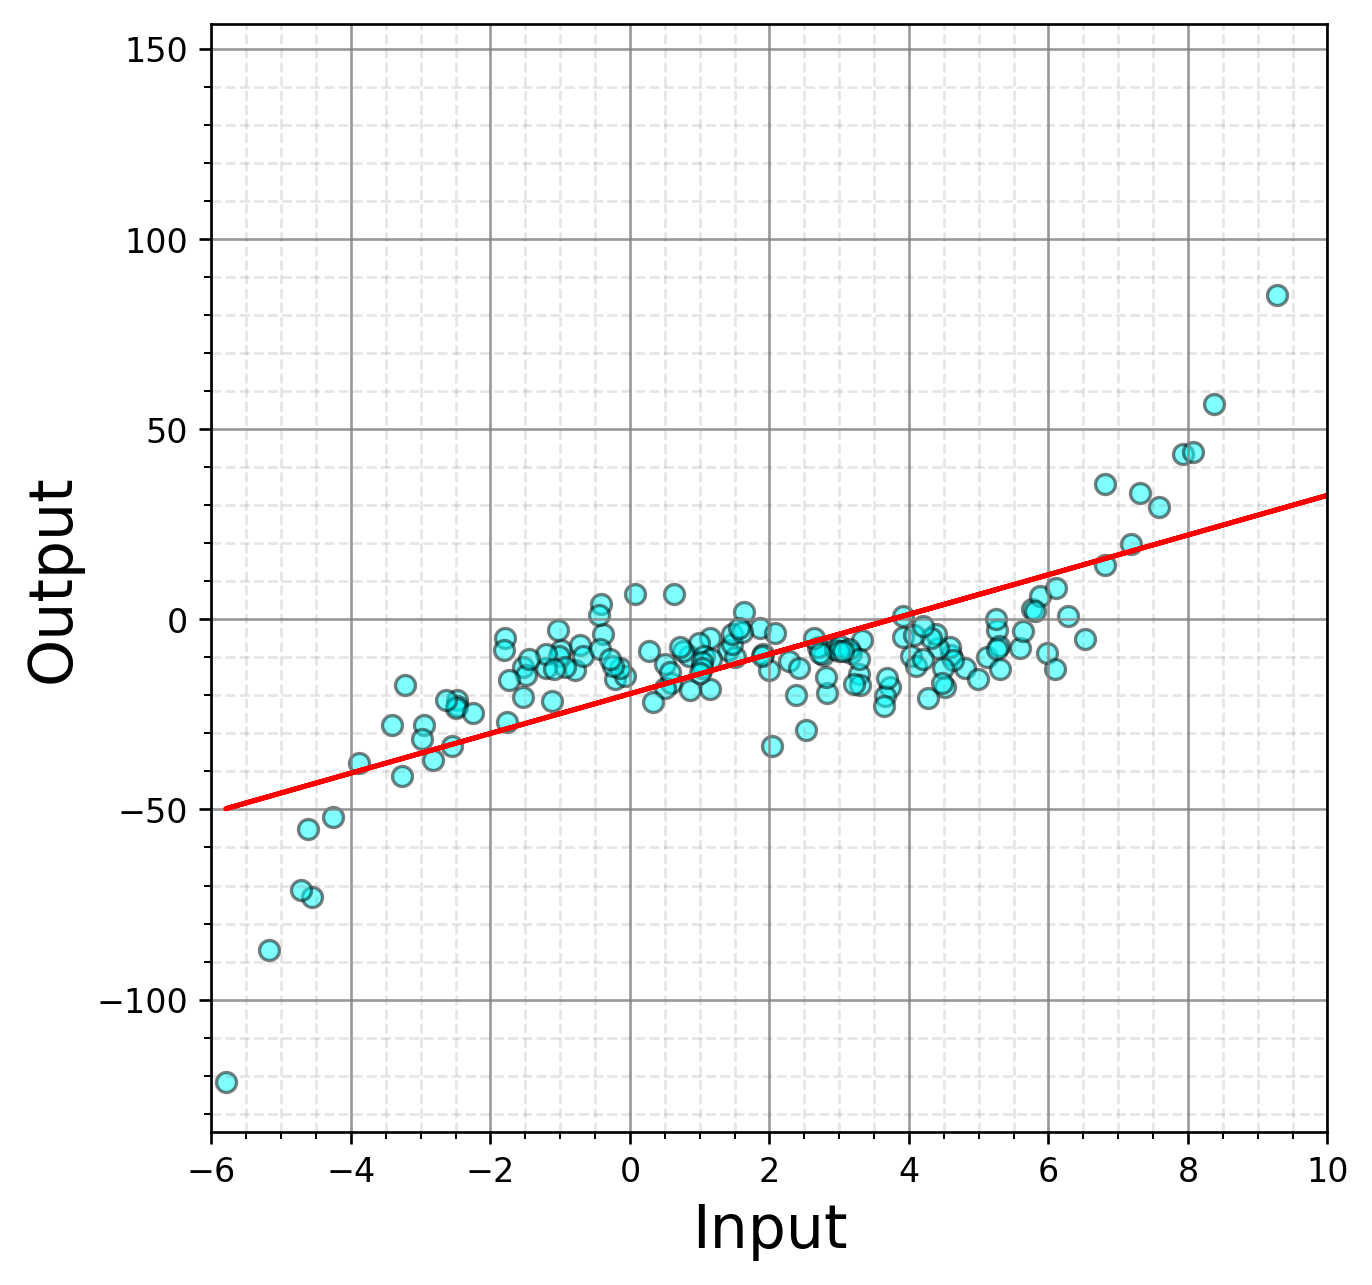

In [7]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,8) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.plot(x, y_pred, '-',color='r') # here we plot the line
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [10]:
ind = (np.abs(y-model.predict(x.reshape(-1,1)))<5)

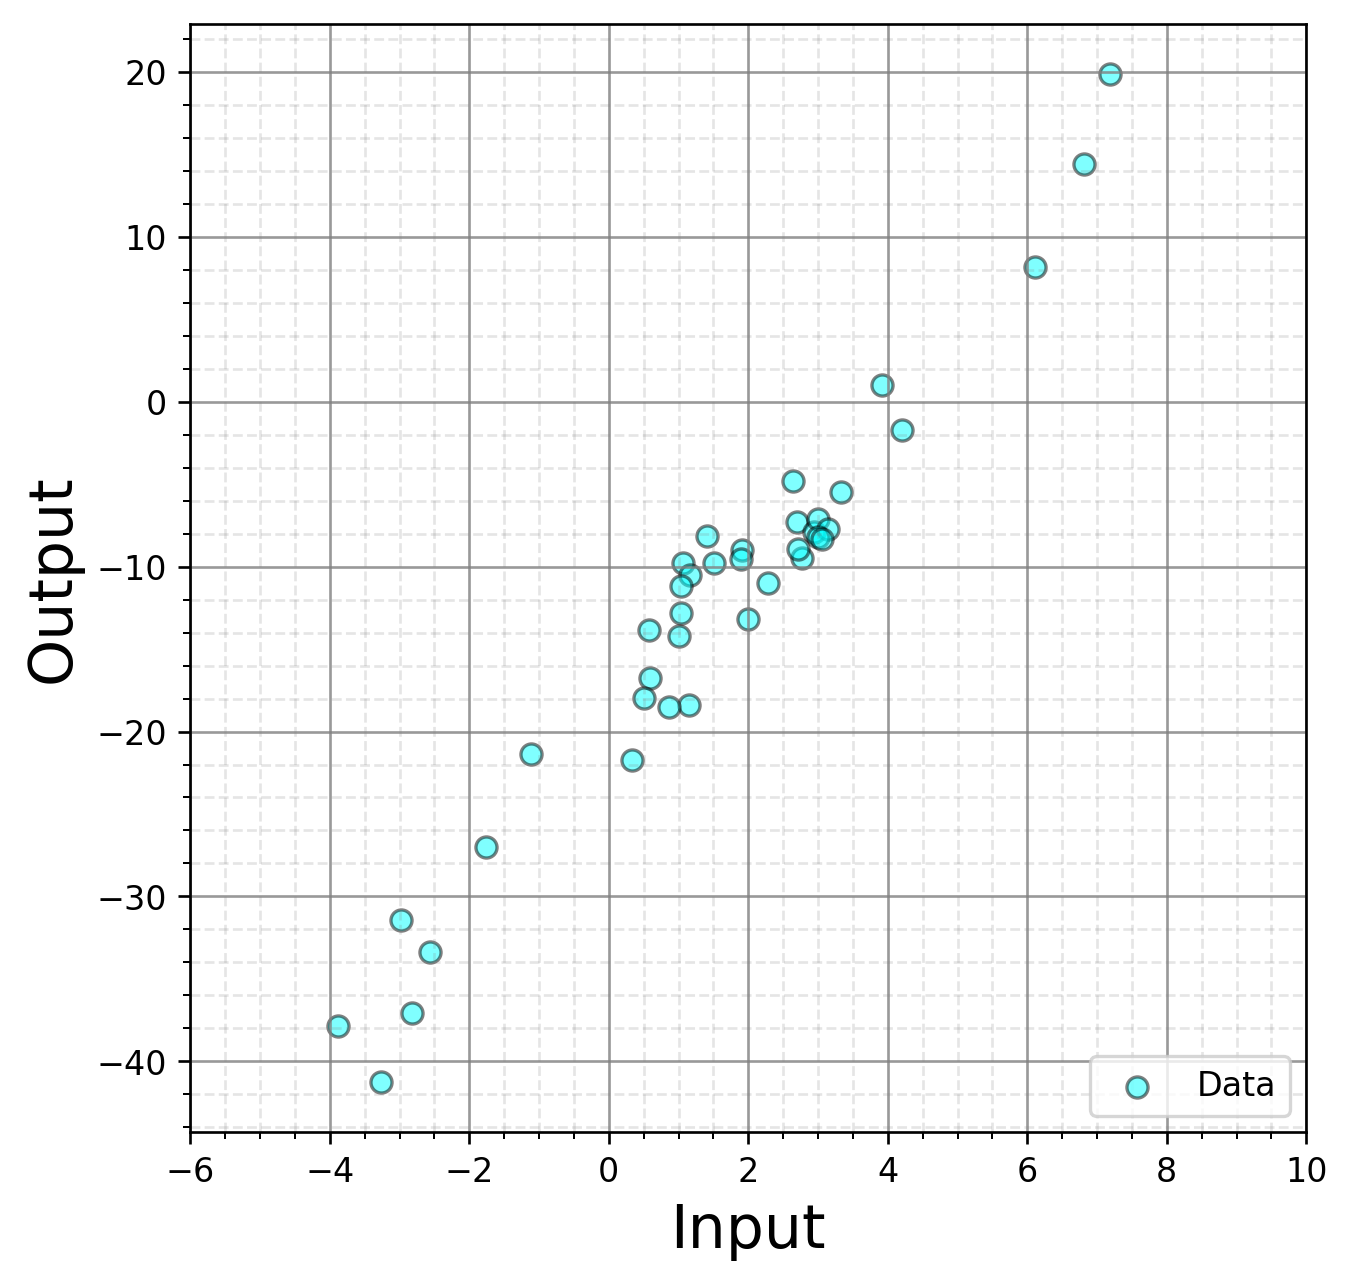

In [12]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x[ind],y[ind],ec='k',s=40,color='cyan',alpha=0.5,label='Data') # we generate a scatter plot of x and y
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.legend(loc='lower right')
plt.savefig('train.png',dpi=300)
plt.show()

In [ ]:
# we want the R2 score (coefficient of determination)
model.score(x.reshape(-1,1),y)

0.4681903341708725

In [23]:
lm = LinearRegression()
lm.fit(x[ind].reshape(-1,1),y[ind])

LinearRegression()

In [24]:
yhat = lm.predict(np.array([-5,8]).reshape(-1,1))

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

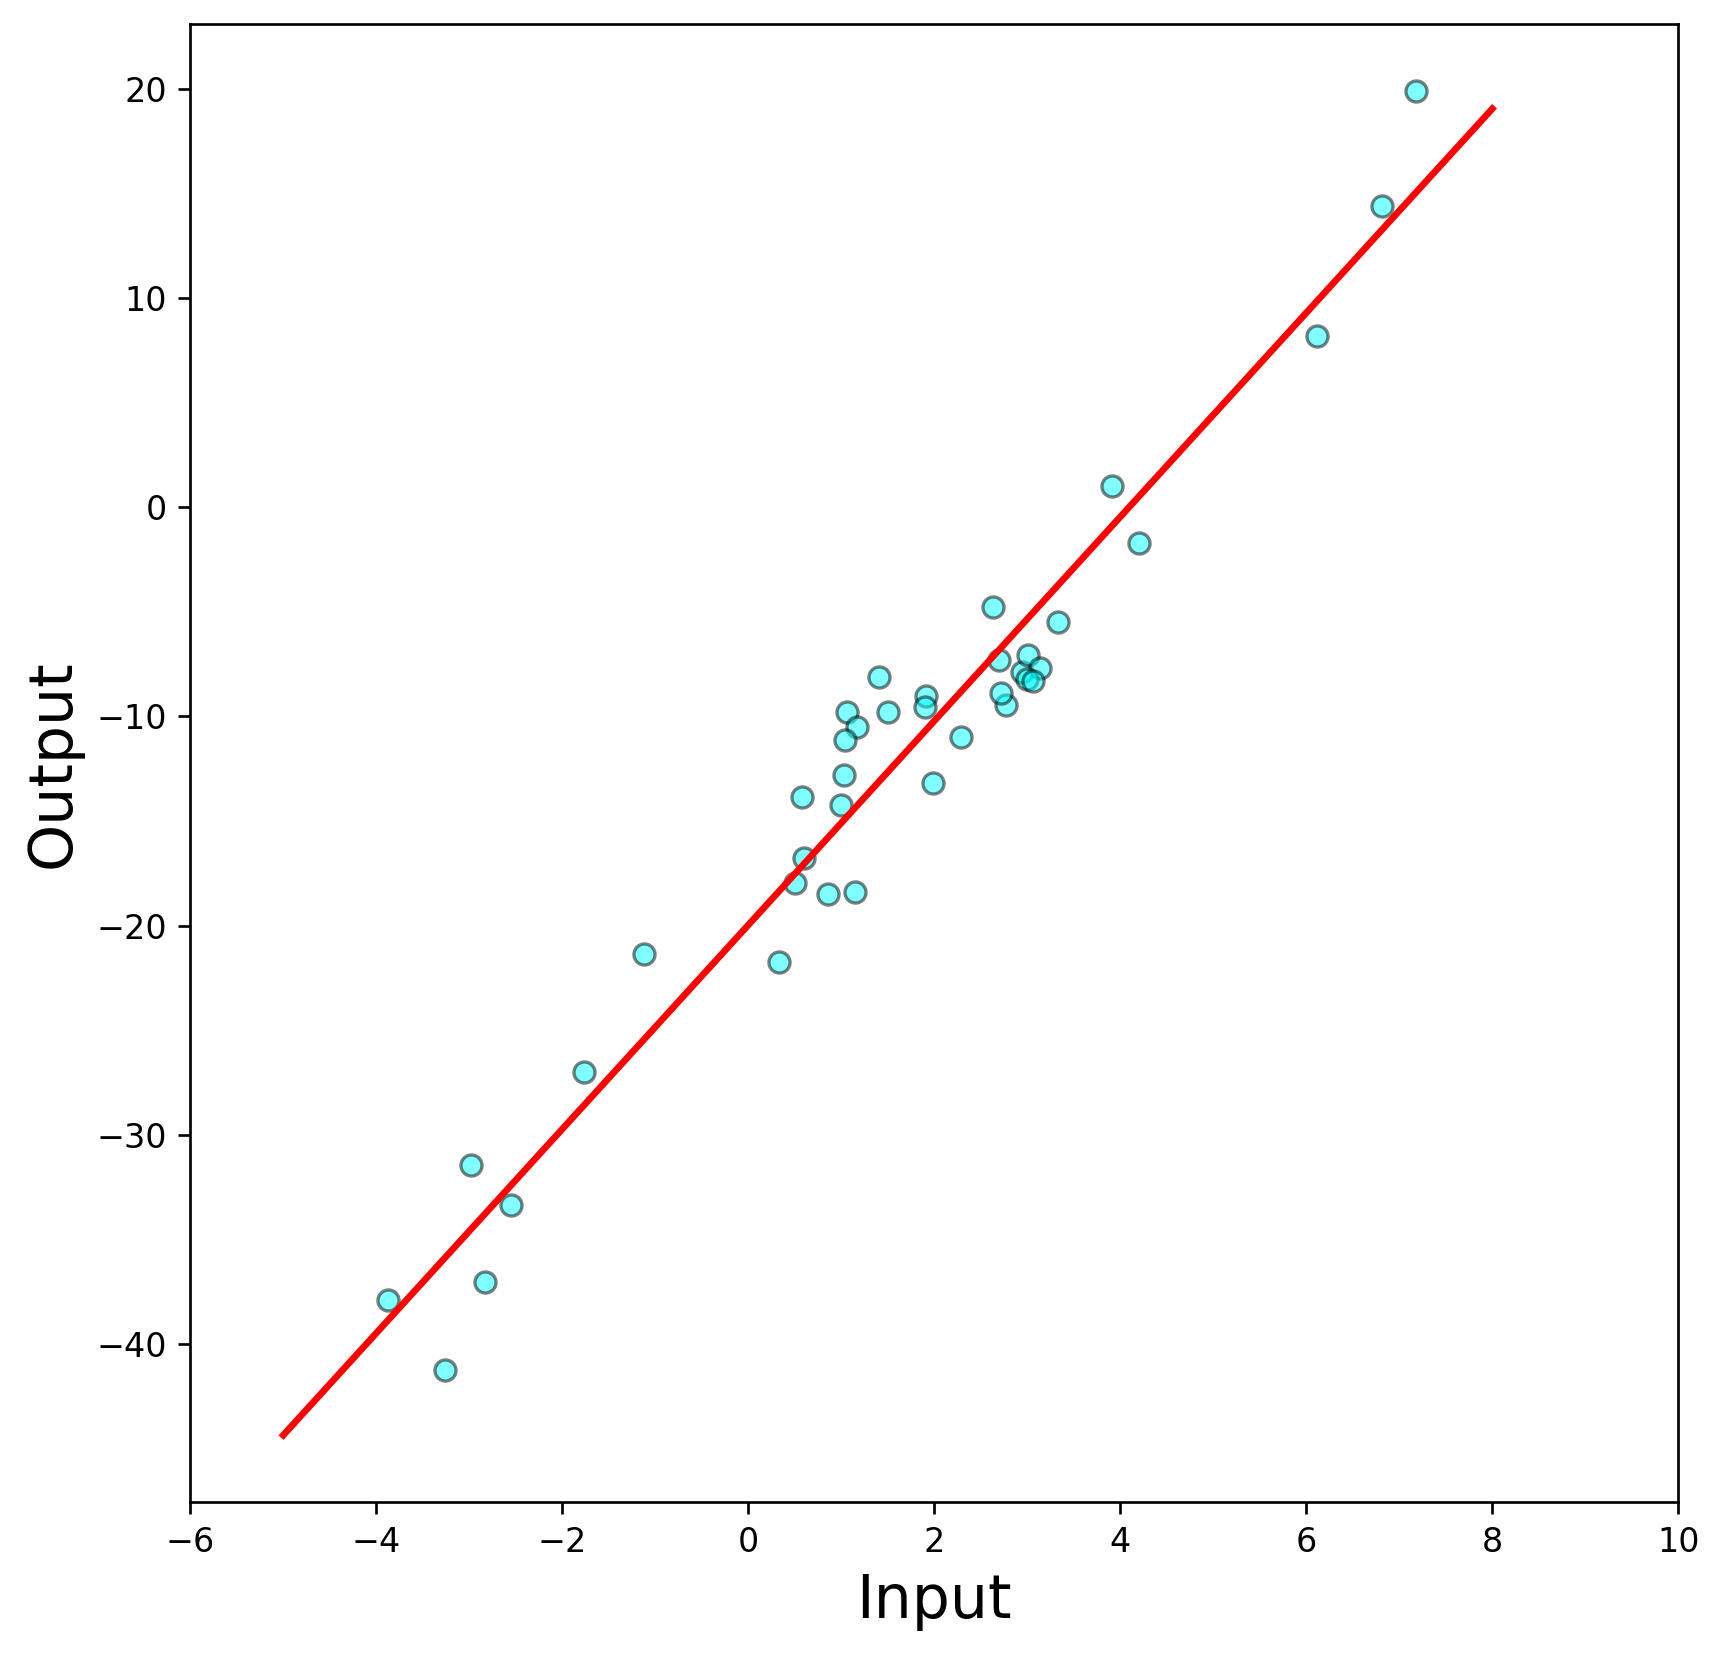

In [25]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,8) # here we setup a desired figure size.
ax.scatter(x[ind],y[ind],ec='k',s=40,color='cyan',alpha=0.5,label='Data') # we generate a scatter plot of x and y
ax.plot([-5,8],yhat,color='red',lw=2,label='Linear Model')
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.legend(loc='lower right')
plt.savefig('train_linear.png',dpi = 300)
plt.show()

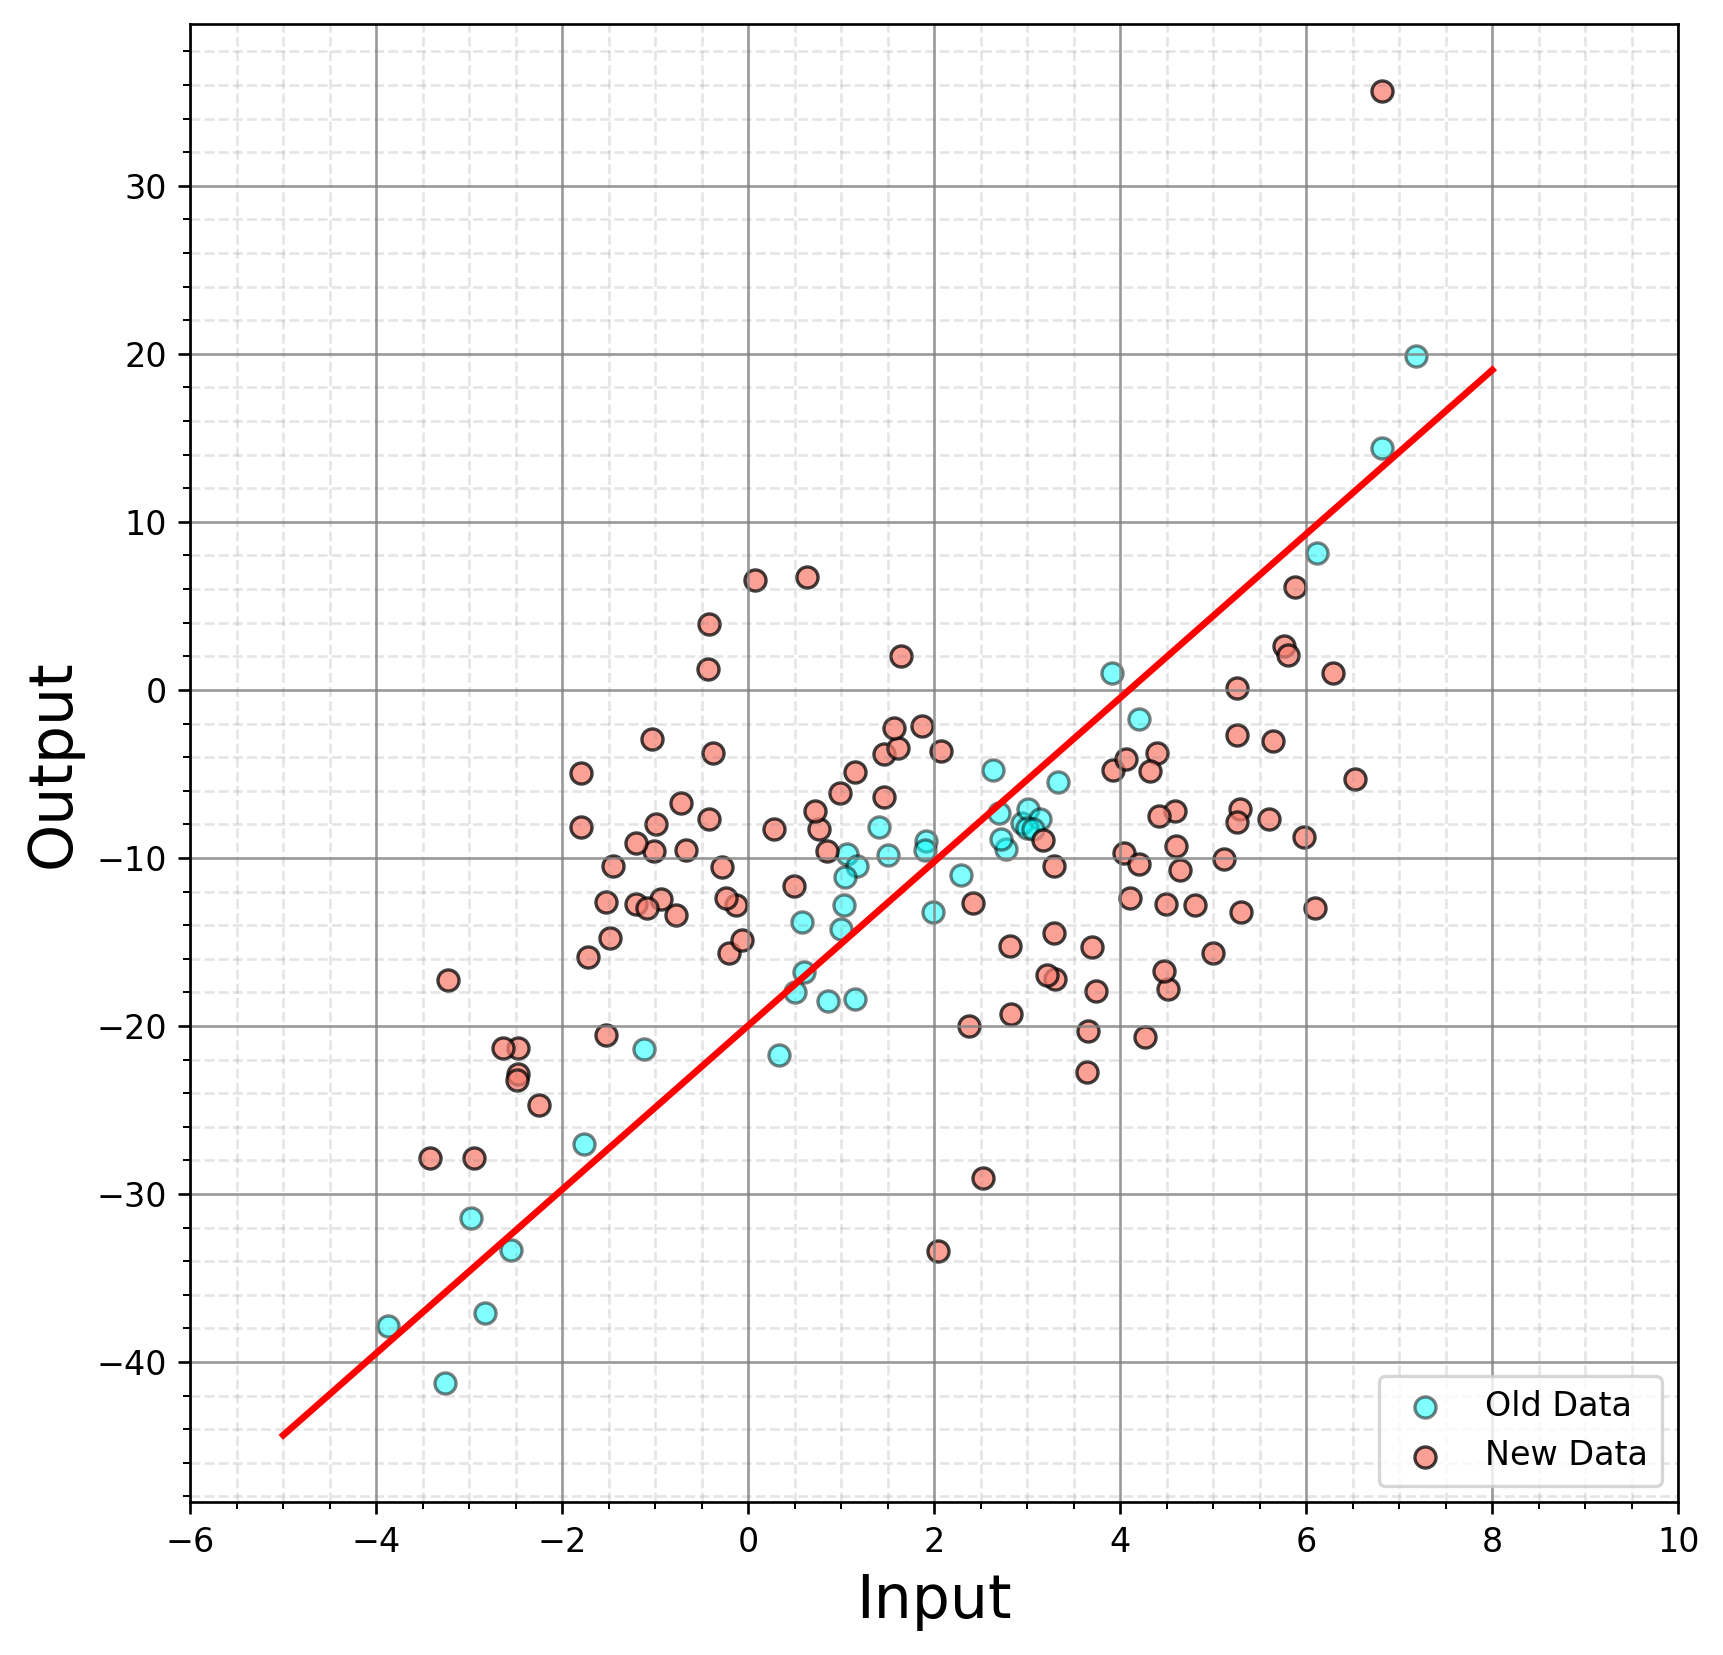

In [26]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,8) # here we setup a desired figure size.
ax.scatter(x[ind],y[ind],ec='k',s=40,color='cyan',alpha=0.5,label='Old Data') # we generate a scatter plot of x and y
ax.scatter(x[(~ind)&(x>-4)&(x<7)],y[~ind&(x>-4)&(x<7)],ec='k',s=40,color='salmon',alpha=0.75,label='New Data') # we generate a scatter plot of x and y
ax.plot([-5,8],yhat,color='red',lw=2)
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.legend(loc='lower right')
plt.savefig('traintest.png',dpi = 300)
plt.show()

In [ ]:
r2_score(y,model.predict(x.reshape(-1,1)))

0.4681903341708725

### Here we make polynomial features

In [16]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x.reshape((-1,1))) # in x_poly we get the polynomial features

In [18]:
x_poly

array([[ 1.00000000e+00,  5.25689181e+00,  2.76349115e+01,
         1.45273740e+02,  7.63688334e+02],
       [ 1.00000000e+00, -9.92036340e-01,  9.84136099e-01,
        -9.76298774e-01,  9.68523862e-01],
       [ 1.00000000e+00,  1.15106451e+00,  1.32494950e+00,
         1.52510234e+00,  1.75549117e+00],
       [ 1.00000000e+00,  6.51888414e+00,  4.24958505e+01,
         2.77025526e+02,  1.80589731e+03],
       [ 1.00000000e+00,  3.73580076e+00,  1.39562073e+01,
         5.21376097e+01,  1.94775722e+02],
       [ 1.00000000e+00, -2.95430961e+00,  8.72794528e+00,
        -2.57850526e+01,  7.61770288e+01],
       [ 1.00000000e+00,  9.28003773e+00,  8.61191003e+01,
         7.99188500e+02,  7.41649943e+03],
       [ 1.00000000e+00,  3.28673789e+00,  1.08026459e+01,
         3.55054657e+01,  1.16697159e+02],
       [ 1.00000000e+00, -1.79780878e+00,  3.23211640e+00,
        -5.81072722e+00,  1.04465764e+01],
       [ 1.00000000e+00,  4.60022121e+00,  2.11620352e+01,
         9.73500429e+01

In [19]:
# the model created is linear in weights
model = LinearRegression(fit_intercept=False)
model.fit(x_poly, y) # so we fit linear regression of polynomial features
y_poly_pred = model.predict(x_poly)

In [20]:
model.score(x_poly,y)

0.9212634691651588

In [15]:
model.score(x_poly,y)

0.9210046287352598

In [ ]:
model.intercept_

0.0

In [ ]:
r2 = r2_score(y,y_poly_pred)
print(r2)

0.9065900793800235


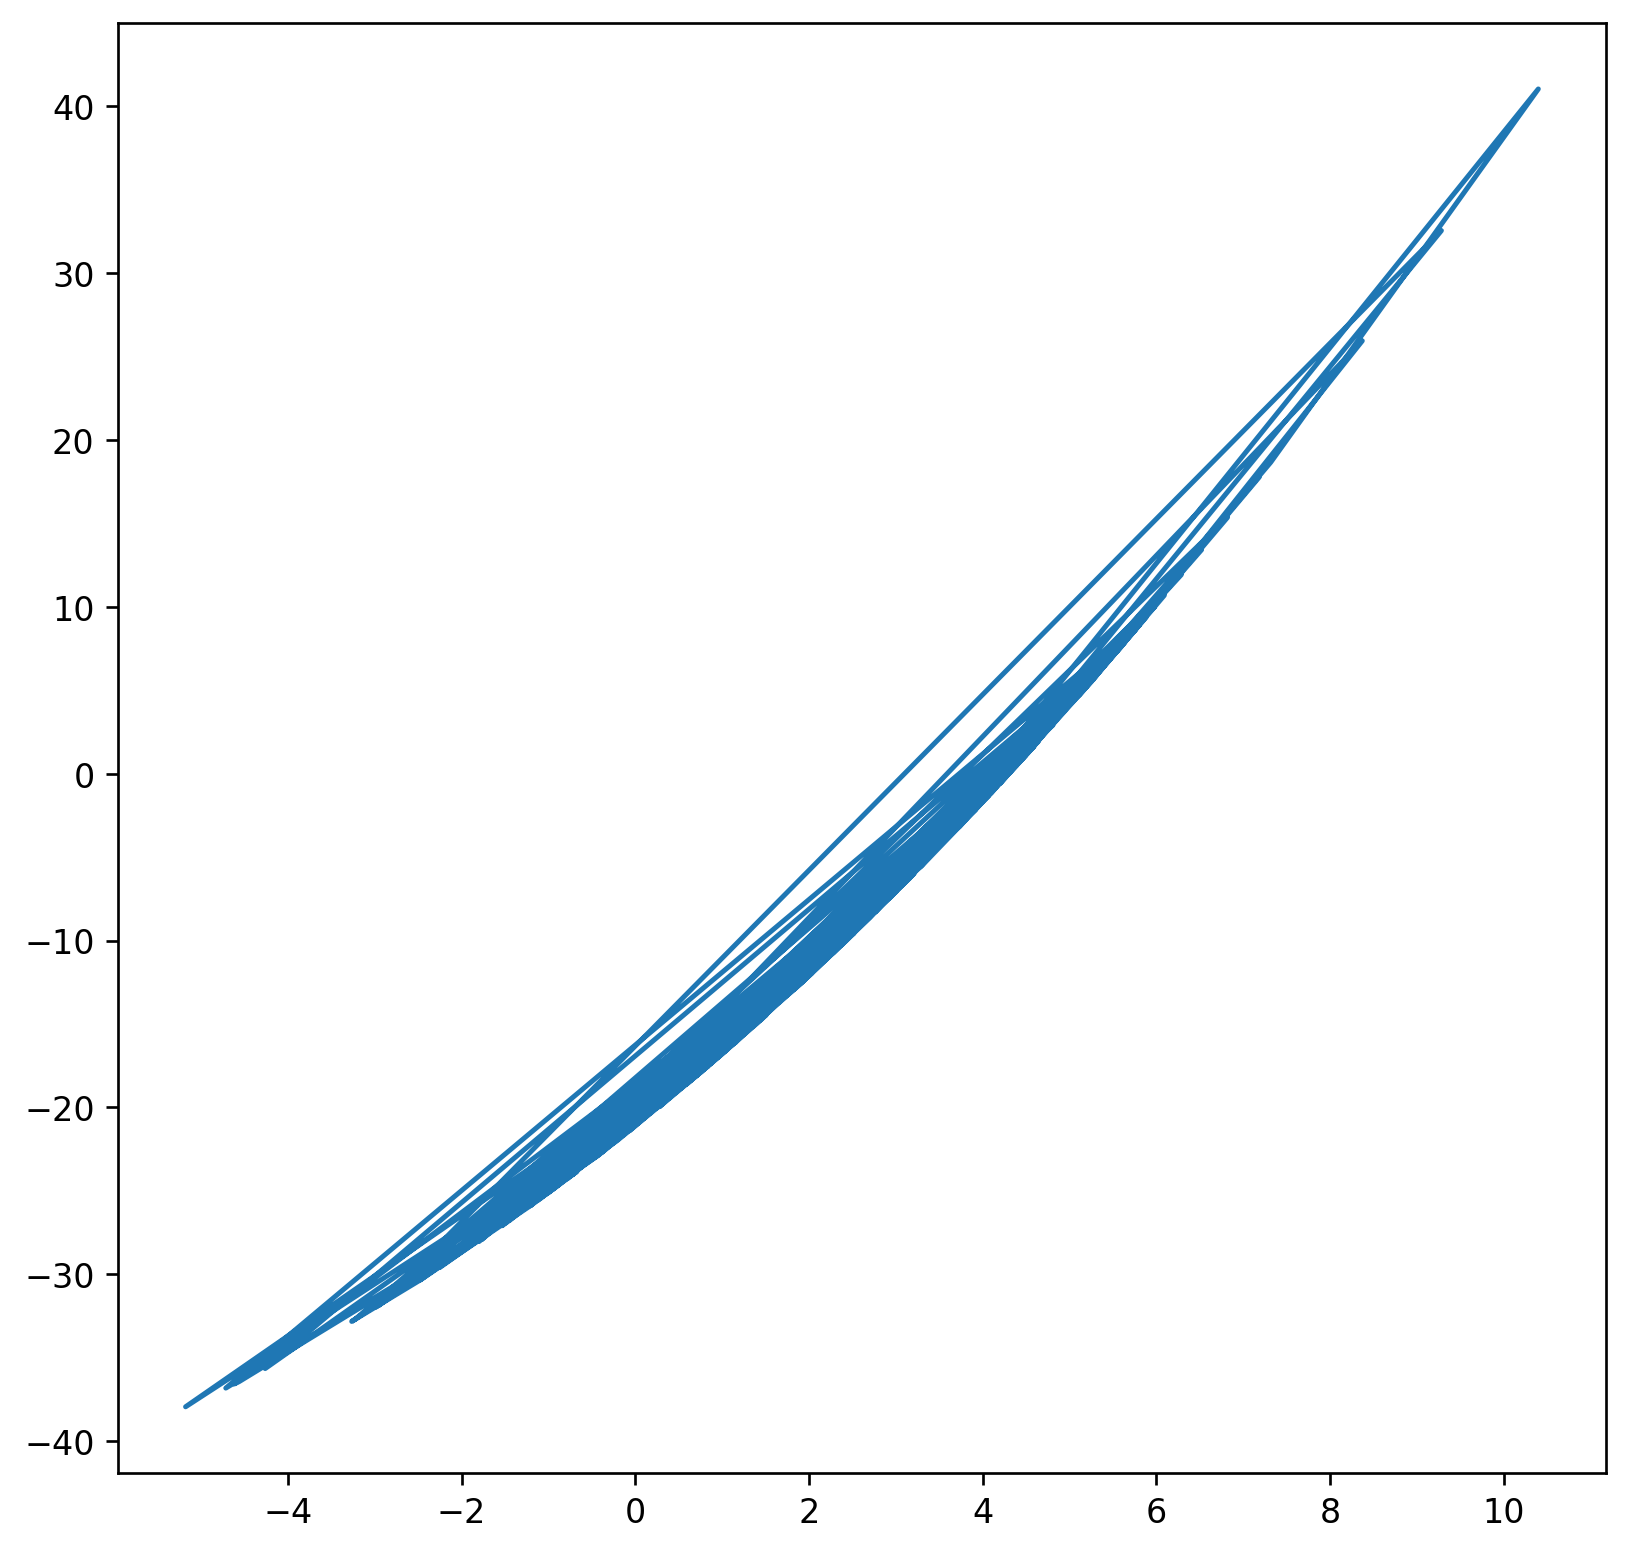

In [ ]:
# this is the wrong way to visualize x vs predicted values.
plt.plot(x,y_poly_pred)

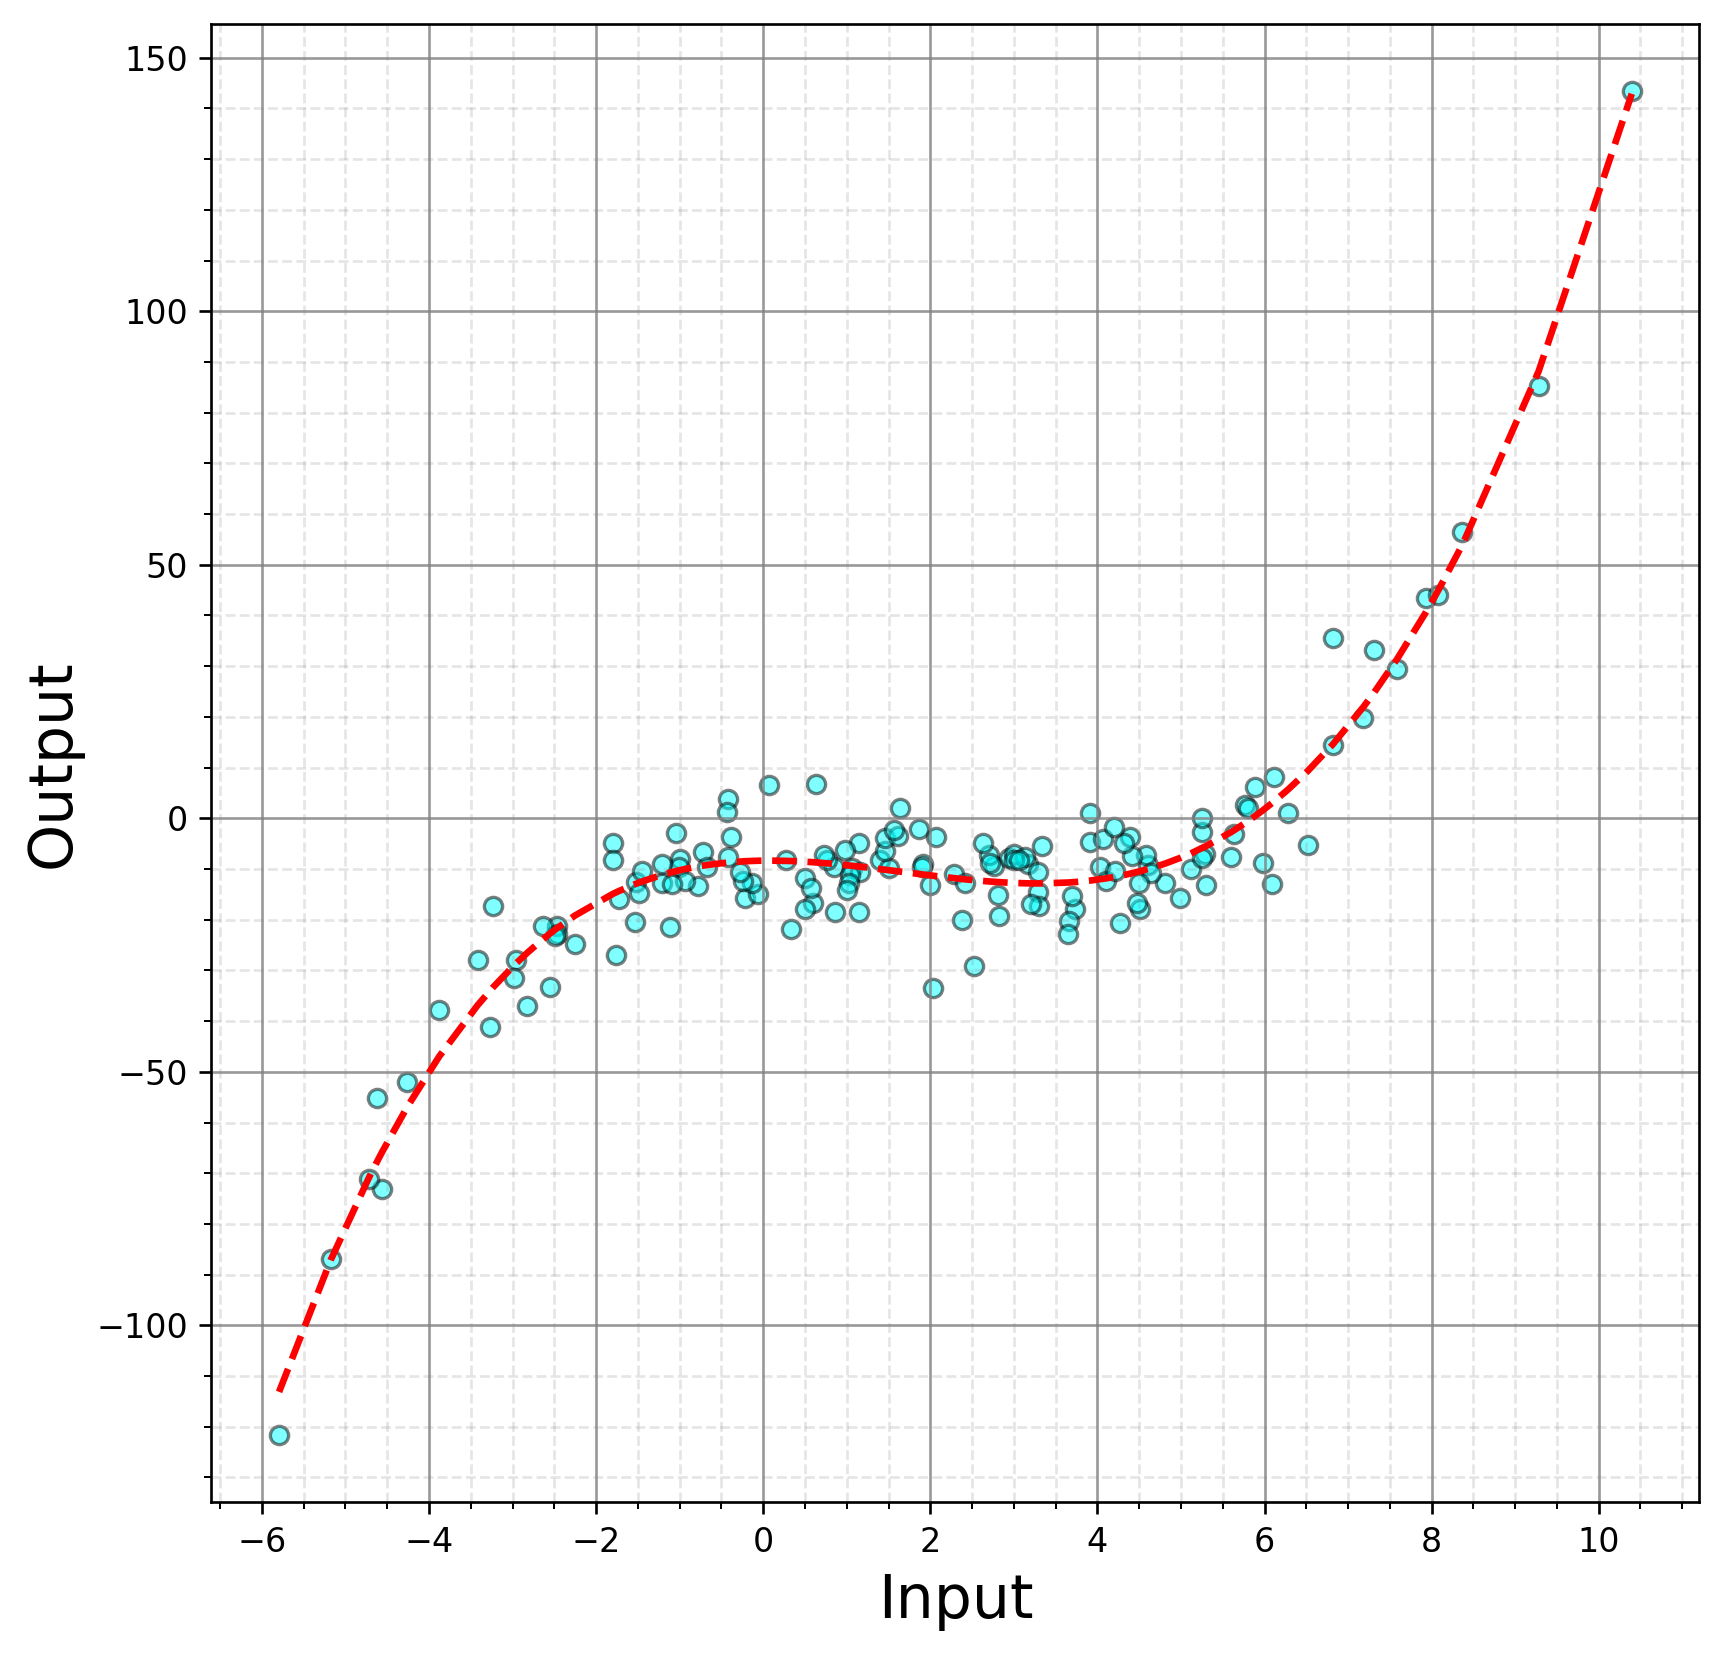

In [21]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred_sortedbyx = zip(*sorted_zip)
ax.plot(x_sorted, y_poly_pred_sortedbyx, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [ ]:
model.score(x_poly,y)

0.907817231070616

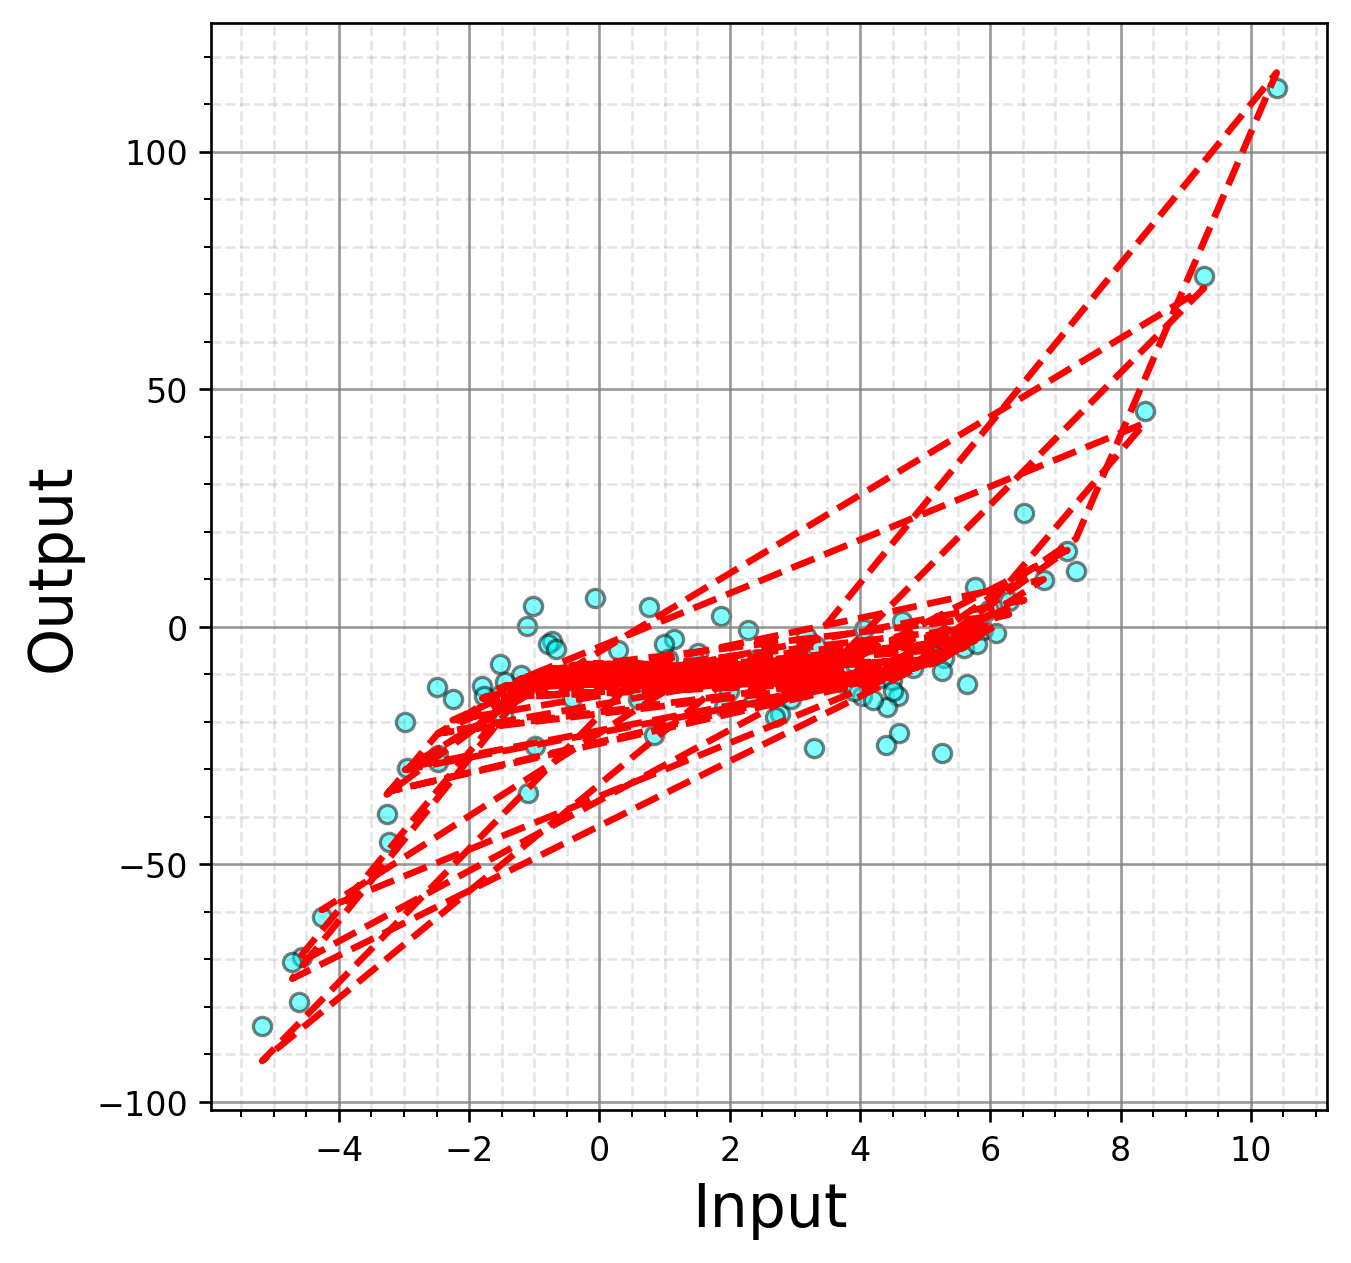

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
#x_sorted, y_poly_pred = zip(*sorted_zip)
ax.plot(x, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

##<font color='red'> In general, a nonlinear function is not always a polynomial. Example: a noisy sine wave</font>

In [ ]:
x = np.linspace(0,np.pi,150)
epsilon = np.random.normal(scale=0.2,size=x.shape)
y = np.sin(4*x) + epsilon

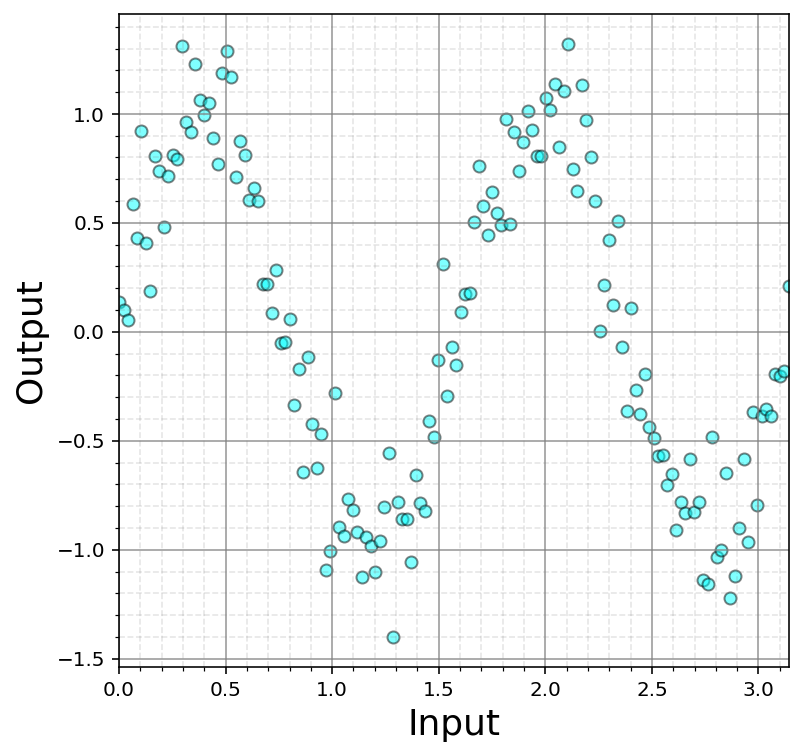

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.set_xlim([0,np.pi]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In class example: fit a polynomial function

In [ ]:
# create polynomial features and "guess" the best degree for this example
poly = PolynomialFeatures(degree=7)
xpoly = poly.fit_transform(x.reshape(-1,1))
model = LinearRegression(fit_intercept=False)
model.fit(xpoly,y)
yhat = model.predict(xpoly)

The R2 coefficient of determination is : 0.924575829262226


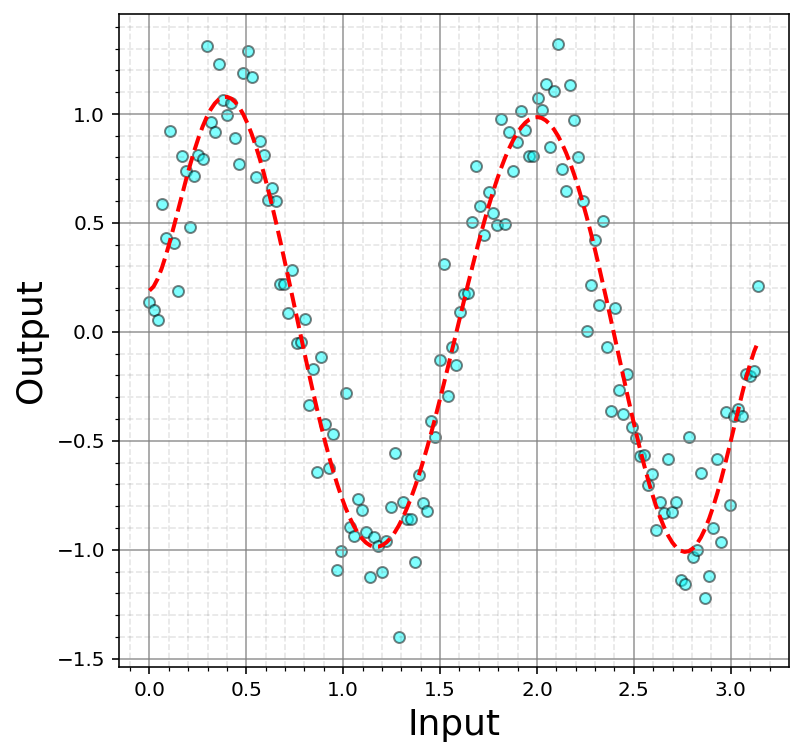

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
ax.plot(x, yhat, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
print('The R2 coefficient of determination is : ' +str(model.score(xpoly,y)))
plt.show()

## 2. Polynomial models with two or more variables

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cars = pd.read_csv('drive/My Drive/Data Sets/cars.csv')

In [ ]:
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [ ]:
X = cars[['ENG','WGT']]

In [ ]:
scale = StandardScaler()
X = pd.DataFrame(data=scale.fit_transform(X), columns=X.columns)

In [ ]:
X

,ENG,WGT
0,1.077290,0.620540
1,1.488732,0.843334
2,1.182542,0.540382
3,1.048584,0.536845
4,1.029447,0.555706
...,...,...
387,-0.520637,-0.221125
388,-0.932079,-0.999134
389,-0.568479,-0.804632
390,-0.712005,-0.415627


In [ ]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function.
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns.
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power)
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and
    outputs a labeled pandas dataframe
    https://gist.github.com/michaelguia/a87d76eb6722a90893f375bff87260f7
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " * " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

In [ ]:
df = PolynomialFeatures_labeled(X,6)

In [ ]:
len(df.columns)

28